<a href="https://colab.research.google.com/github/mokshitagupta/cse216-analysis/blob/main/Another_copy_of_br_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from time import sleep
! pip3 install app-store-scraper
! pip3 install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np
import json

# from app_store_scraper import AppStore
# tiktok = AppStore(country='us', app_name='bereal', app_id = '1459645446')

# tiktok.review(how_many=2000, sleep=0.01)

ERROR:Base:Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/us/apps/1459645446/reviews?l=en-GB&offset=0&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))


In [ ]:
tiktokdf2 = pd.read_json('reviews_bereal.json')
tiktokdf2 =  tiktokdf2.rename(columns={"score": "rating", "text": "review"})
tiktokdf2.head()

,id,userName,userImage,date,rating,scoreText,url,title,review,replyDate,replyText,version,thumbsUp,criterias
0,52ae3d6b-994f-4d8e-be6d-6253e2af8fc7,Caleb Livingston,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-21 00:02:09.337000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,It's really fun to post and to see your friend...,None,None,3.14.1,38,[]
1,84796844-e592-47d8-a690-0d73f69345b0,Melanie Hahn,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-10-28 02:58:18.208000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,BeReal is a lot of fun and I think it's amazin...,None,None,3.10.2,34,"[{'criteria': 'vaf_apps_attribute_anime_v1', '..."
2,2b2959ba-d449-45c1-ba90-86d691f91e88,Remi West,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-12-02 20:10:04.719000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"I love this app. This was/is such a cool idea,...",None,None,3.15.1,0,"[{'criteria': 'vaf_phase1_privacy_controls', '..."
3,8add8c34-bac1-4fce-9826-8cb93be61ba0,Micah Southam,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-10-04 05:17:14.876000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,(Edit: everything is back to working perfectly...,None,None,3.8.0,4,[{'criteria': 'vaf_apps_attribute_download_for...
4,c1da0eed-3cb0-4aa2-8999-cb1f90b41c08,Henry Baum,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-09-18 03:16:21.274000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,I don't find most of the updates as terrible a...,None,None,3.3.0,148,[]


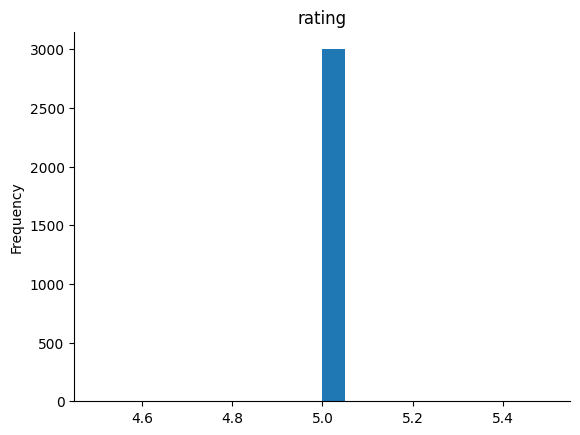

In [ ]:
# @title rating

from matplotlib import pyplot as plt
tiktokdf2['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
tiktokdf2.to_csv("data.csv")

In [ ]:
words_to_check = ['other','tiktok shop','ecommerce']
mask = [word in words_to_check for word in tiktokdf2['review'] ]
# print(mask)
tiktokdf2[mask].head()

,id,userName,userImage,date,rating,scoreText,url,title,review,replyDate,replyText,version,thumbsUp,criterias


In [ ]:
sia = SentimentIntensityAnalyzer()
tiktokdf2['sentiment'] = tiktokdf2['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

tiktokdf2['theme'] = tiktokdf2['sentiment'].apply(lambda x: 'Positive' if x > 0.05 else 'Negative' if x < -0.05 else 'Neutral')
tiktokdf2.head()

,id,userName,userImage,date,rating,scoreText,url,title,review,replyDate,replyText,version,thumbsUp,criterias,sentiment,theme
0,52ae3d6b-994f-4d8e-be6d-6253e2af8fc7,Caleb Livingston,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-11-21 00:02:09.337000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,It's really fun to post and to see your friend...,None,None,3.14.1,38,[],0.8228,Positive
1,84796844-e592-47d8-a690-0d73f69345b0,Melanie Hahn,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-10-28 02:58:18.208000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,BeReal is a lot of fun and I think it's amazin...,None,None,3.10.2,34,"[{'criteria': 'vaf_apps_attribute_anime_v1', '...",0.9042,Positive
2,2b2959ba-d449-45c1-ba90-86d691f91e88,Remi West,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-12-02 20:10:04.719000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,"I love this app. This was/is such a cool idea,...",None,None,3.15.1,0,"[{'criteria': 'vaf_phase1_privacy_controls', '...",0.9715,Positive
3,8add8c34-bac1-4fce-9826-8cb93be61ba0,Micah Southam,https://play-lh.googleusercontent.com/a-/ALV-U...,2024-10-04 05:17:14.876000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,(Edit: everything is back to working perfectly...,None,None,3.8.0,4,[{'criteria': 'vaf_apps_attribute_download_for...,0.9074,Positive
4,c1da0eed-3cb0-4aa2-8999-cb1f90b41c08,Henry Baum,https://play-lh.googleusercontent.com/a/ACg8oc...,2024-09-18 03:16:21.274000+00:00,5,5,https://play.google.com/store/apps/details?id=...,NaN,I don't find most of the updates as terrible a...,None,None,3.3.0,148,[],-0.8555,Negative


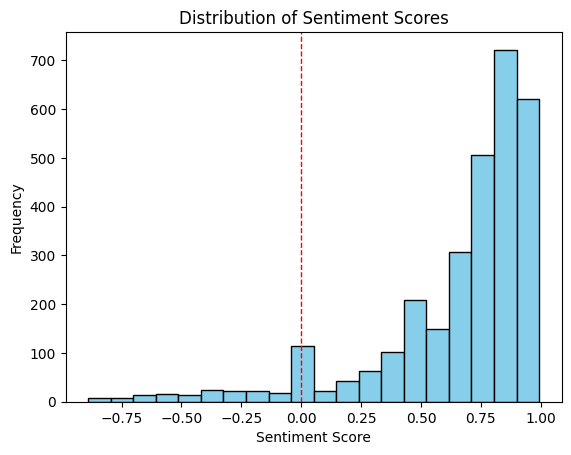

In [ ]:
plt.hist(tiktokdf2['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Add a vertical line at 0
plt.show()

<ipython-input-47-dc73b1641908>:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-47-dc73b1641908>:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-47-dc73b1641908>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-47-dc73b1641908>:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_year['month'] = df_year['date'].dt.to_period('M')
<ipython-input-47-dc73b1641908>:22: SettingWithCopyWarning: 
A value is 

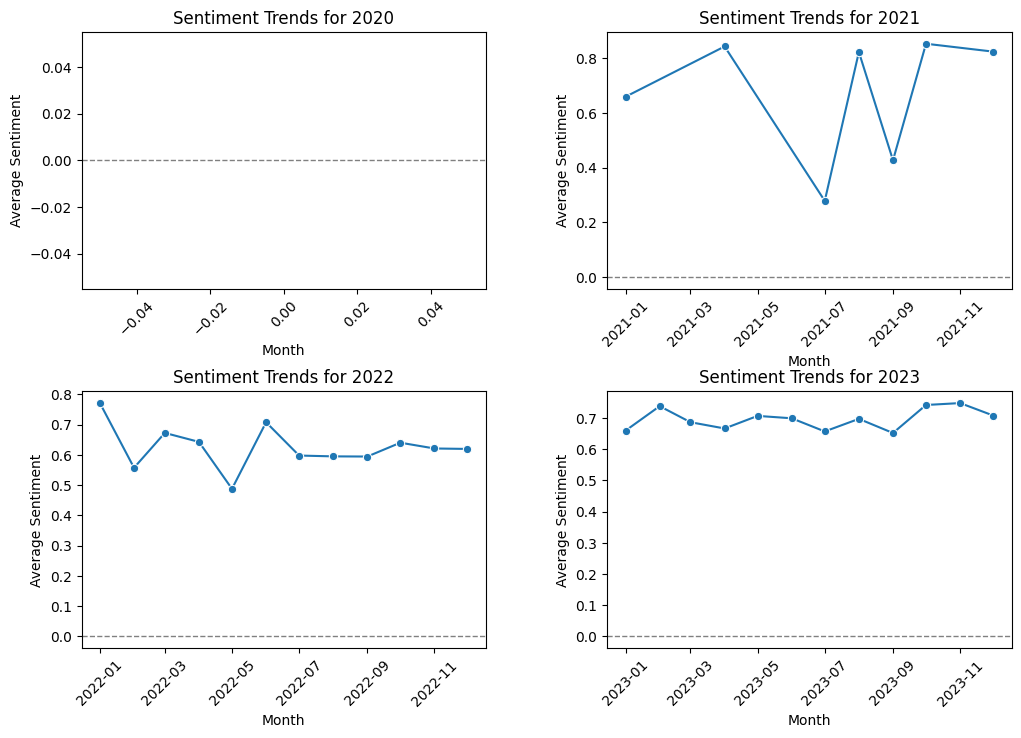

In [ ]:
import numpy as np

# Plot
import seaborn as sns
# Convert 'date' column to datetime
tiktokdf2['date'] = pd.to_datetime(tiktokdf2['date'])

# Define the range of years to plot
start_year = 2020
end_year = 2024
years = range(start_year, end_year )

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12,8), sharex=False)
axes = axes.flatten()

for i, year in enumerate(years):
    # Filter data for the current year
    df_year = tiktokdf2[tiktokdf2['date'].dt.year == year]

    # Group by month and calculate average sentiment
    df_year['month'] = df_year['date'].dt.to_period('M')
    sentiment_trends = df_year.groupby('month')['sentiment'].mean().reset_index()
    sentiment_trends['month'] = sentiment_trends['month'].dt.to_timestamp()

    # Plot sentiment trends for the current year
    sns.lineplot(x='month', y='sentiment', data=sentiment_trends, marker='o', ax=axes[i])
    axes[i].set_title(f'Sentiment Trends for {year}')
    axes[i].axhline(0, color='gray', linestyle='dashed', linewidth=1)  # Reference line at 0
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Sentiment')

# Adjust layout
plt.subplots_adjust(hspace=0.4, wspace=0.3)# plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Convert text to vectors
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tiktokdf2['review'])

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
tiktokdf2['cluster'] = kmeans.fit_predict(X)

# Analyze cluster themes
for cluster in set(tiktokdf2['cluster']):
    print(f"Cluster {cluster}:")
    print(tiktokdf2[tiktokdf2['cluster'] == cluster]['review'].head())


Cluster 0:
1     BeReal is a lot of fun and I think it's amazin...
5     I love BeReal so much i have so many of my fri...
10    I like it but sometimes it's annoying when you...
14    I'm literally obsessed with this app. I've had...
28    I love this! I get to see what my friends are ...
Name: review, dtype: object
Cluster 1:
13    I love it, it's a great app, total privacy if ...
20    I love this app, it is so fun to share with yo...
21    Great app. I love this app, and truly I believ...
29    Great app!!! I love that there are no filters ...
33    Love this app! Totally worth downloading! Only...
Name: review, dtype: object
Cluster 2:
0    It's really fun to post and to see your friend...
2    I love this app. This was/is such a cool idea,...
3    (Edit: everything is back to working perfectly...
4    I don't find most of the updates as terrible a...
6    Very nice to be able to see your friends witho...
Name: review, dtype: object


<ipython-input-49-5bba0ace221b>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tiktokdf2['year_month'] = tiktokdf2['date'].dt.to_period('M')


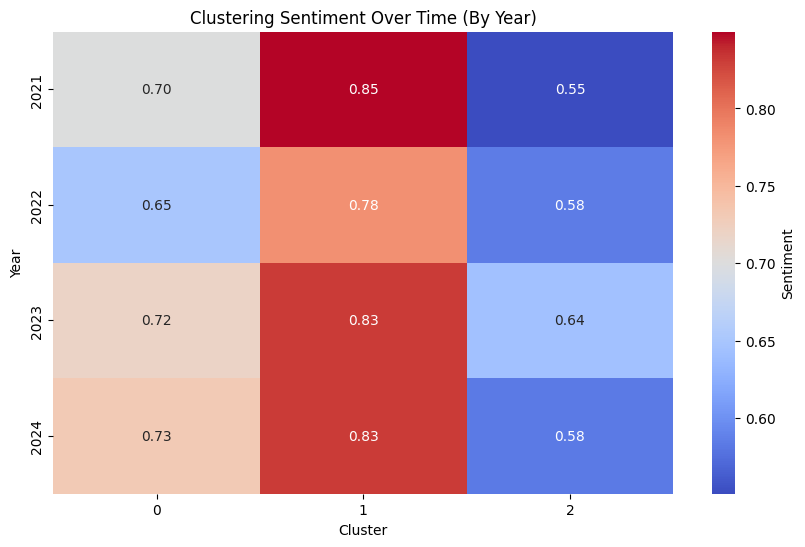

In [ ]:
# Extract the year-month from the date
tiktokdf2['year_month'] = tiktokdf2['date'].dt.to_period('M')
tiktokdf2['year'] = tiktokdf2['date'].dt.year

df_pivot = tiktokdf2.pivot_table(index='year', columns='cluster', values='sentiment', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Sentiment'})
plt.title('Clustering Sentiment Over Time (By Year)')
plt.xlabel('Cluster')
plt.ylabel('Year')
plt.show()


In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt_tab')
nltk.download('stopwords')


def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase to standardize
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

tiktokdf2['tokens'] = tiktokdf2['review'].apply(tokenize_text)

# Create a dictionary and corpus
texts = tiktokdf2['tokens'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

n= 7

# Train LDA model
lda = LdaModel(corpus, num_topics=n, id2word=dictionary, passes=15)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Print themes
for idx, topic in lda.show_topics(num_topics=n, num_words=150, formatted=False):
    print(f"Topic {idx}: {[word for word, _ in topic]}")

Topic 0: ['friends', 'fun', "'s", 'way', 'good', 'app', 'great', 'see', 'cool', 'connect', 'keep', 'really', 'share', 'family', 'real', 'day', 'ur', 'simple', 'use', 'concept', 'easy', 'get', 'moment', 'pretty', 'perfect', 'nice', 'like', 'touch', 'u', '👍', 'little', 'know', 'pictures', 'photos', 'memories', 'love', 'life', 'awesome', 'able', 'daily', 'interesting', 'close', 'time', 'also', 'contact', 'amazing', 'check', 'sharing', 'na', 'look', 'creative', 'fake', 'keeping', 'people', 'cute', 'everyone', 'say', 'something', 'think', 'show', 'throughout', 'unique', 'go', 'back', 'many', 'lives', 'need', 'wan', 'super', 'pic', 'snap', 'would', 'taking', 'silly', 'whatever', 'internet', 'catch', 'laugh', 'date', 'join', 'add', 'works', 'streak', 'kinda', 'genuinely', 'happy', 'far', 'capture', 'safe', 'dont', 'randomly', 'quick', 'hope', 'lots', 'perfectly', 'everyday', 'discovery', 'gon', 'story', 'videos', 'stupid', 'space', 'sending', 'world', 'glimpse', 'online', 'big', 'diary', 'w',

{'look': 1.338699949501198e-13, 'help': 2.0086668143961574e-08, 'simple': -3.292675790824635e-17, 'scrolling': 3.5350354919776916e-07, 'loading': 0.002387432880417609, 'ui': -5.580878087011962e-16, 'frustrating': -0.0017676783899012, 'themes': 0.95204646, 'smooth': -0.0017493966982396528, 'click': -0.0010436614975393253, 'laggy': 0.009568629020056988, 'visual': 0.33584376, 'interface': 0.21403972431068524, 'confusing': 0.15786215334825002, 'clean': 0.14887361572031566, 'design': -0.0003515980241295074, 'zoom': 0.36211065, 'feedback': 0.7515201920399999, 'tap': 0.92777, 'minimalist': -0.12998737569232802, 'aesthetic': 0.2732, 'buttons': 0.53234874, 'modern': 0.044263461350094395, 'pinch': 0.4215, 'accessible': 0.7574, 'efficient': 0.799225, 'intuitive': 0.73719396, 'customization': 0.7713, 'layout': 0.5004124999999999, 'swipe': 0.52367964, 'consistency': 0.6808, 'ux': -0.02268145, 'overwhelming': 0.743, 'complex': 0.6375}
[0.6270835443037971, 0.7081268907563031, 0.6065510000000001, 0.85

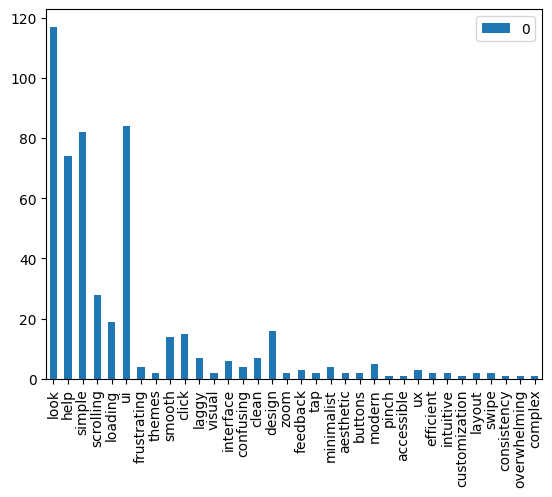

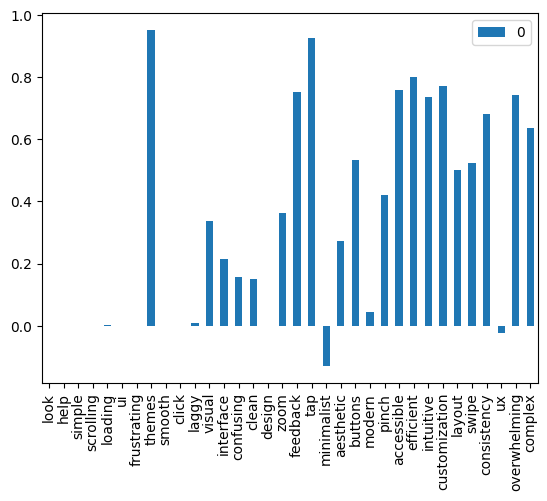

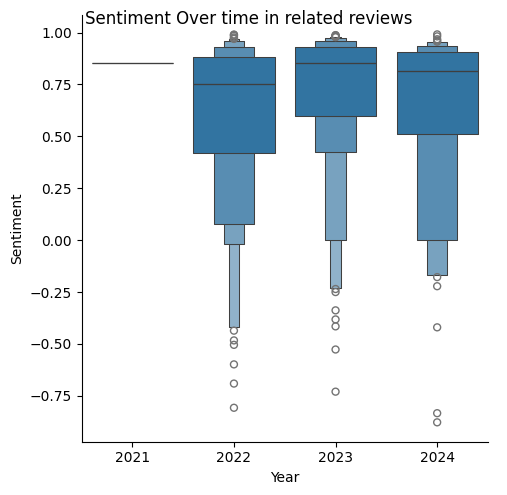

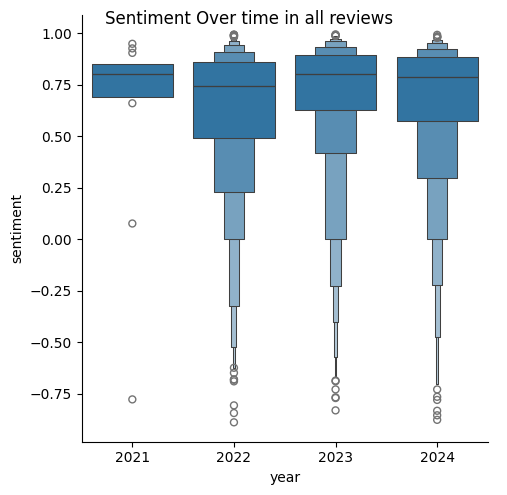

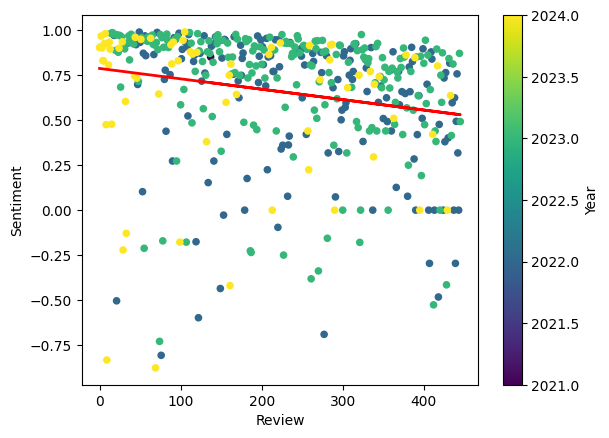

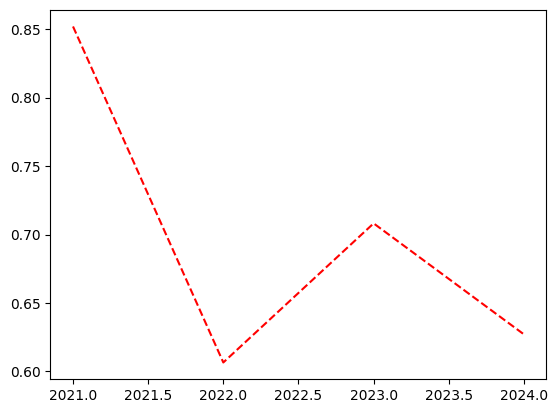

In [ ]:
from nltk.text import Text
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


plt.show()

keywords = [
    "design", "interface", "look", "layout", "aesthetic", "ui", "ux",
    "animations", "gestures", "aesthetics", "navigation", "intuitive",
    "accessibility", "accessible", "usability", "user-friendly",
    "clean", "cluttered", "organized", "confusing", "simple", "complex",
    "modern", "outdated", "responsive", "sluggish", "smooth", "laggy",
    "color scheme", "typography", "font", "readability", "legible",
    "buttons", "icons", "menu", "sidebar", "dashboard", "scrolling",
    "zoom", "pinch", "swipe", "tap", "drag", "drop", "click",
    "feedback", "visual cues", "loading", "error messages",
    "customization", "personalization", "themes", "dark mode",
    "consistency", "coherent", "intuitive", "learning curve",
    "onboarding", "tutorial", "help", "guidance","maximalist",
    "minimalist", "feature-rich", "overwhelming", "streamlined",
    "efficient", "time-consuming", "frustrating", "satisfying", "visual", "visualy"
]

# Flatten the list of tokens across all rows
all_tokens = [word for tokens in tiktokdf2['tokens'] for word in tokens]

# Join all tokens into a single string
text = Text(all_tokens)

hits = {}

senti = {}

# newdf = tiktokdf2.copy()
# Now you can call the concordance function
frq = {}
sentsp = {}
yrs = {}
for (review, sent, yr) in zip(tiktokdf2.review, tiktokdf2.sentiment, tiktokdf2.year):
  for k in keywords:
    if k in review.lower():
      frq[k] = frq.get(k, 0) + 1
      yrs[yr] = yrs.get(yr, []) + [sent]
      hits[(review, sent, yr)] = hits.get((review, sent, yr), 0) + 1
      senti[review] = senti.get(review, []) + [k]
      if sent != 0:
        sentsp[k] = sentsp.get(k, 1) * sent
        # print(k, sent, sentsp[k])

# print(len(list(filter(lambda x: x is not None, sentsp))), len(sentsp))
mat = [[0 for _ in range(len(keywords))] for _ in range(len(senti))]
# print(senti.keys())
for i, entry in list(enumerate(senti.items())):
  for wd in entry[1]:
    mat[i][keywords.index(wd)] = 1

print(sentsp)
df = pd.DataFrame.from_dict(frq, orient='index')
df.plot(kind='bar')
df = pd.DataFrame.from_dict(sentsp, orient='index')
df.plot(kind='bar')
  # for key in entry[1
      # print(review)
  # hits += len(text.concordance_list(key))
  # for i in text.concordance_list(key):
  #   print(i)
  # print(len(text.concordance_list(key)))
# # print(hits.values())
# years = list(set([x[2] for x in hits.keys()]))
df = pd.DataFrame(
    [(i, int(entry[0][2]),entry[0][1], entry[1]) for (i, entry) in list(enumerate(hits.items())) ],
    columns=["Review", "Year", "Sentiment", "Count"]
)
# # senti = [[0 for _ in range(len(keywords))] for _ in range(len(years))]

# # for i, row in df.iterrows():
# #   senti[years.index(row["Year"])][keywords.index(row["k"])] = row["Sentiment"



print([sum(x)/len(x) for x in yrs.values()])
g = sns.catplot(data=df, x="Year", y="Sentiment", kind="boxen")
g.fig.suptitle("Sentiment Over time in related reviews")

g2 = sns.catplot(data=tiktokdf2, x="year", y="sentiment", kind="boxen")
g2.fig.suptitle("Sentiment Over time in all reviews")

# comment_words = ' '

# stopwords = set(STOPWORDS)

# iterate through the csv file
# for val in df.review:

#    # typecaste each val to string
#    val = str(val)

#    # split the value
#    tokens = val.split()

# # Converts each token into lowercase
# for i in range(len(tokens)):
#     tokens[i] = tokens[i].lower()

# for words in tokens:
#     comment_words = comment_words + words + ' '


# wordcloud = WordCloud(width = 800, height = 800,
#             background_color ='white',
#             stopwords = stopwords,
#             min_font_size = 10).generate(comment_words)

# plot the WordCloud image
# plt.figure(figsize = (8, 8), facecolor = None)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.tight_layout(pad = 0)

df = df.sort_values(by="Year")
ax2 = df.plot.scatter(x='Review',
                      y='Sentiment',
                      c='Year',
                      colormap="viridis")

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X, Y = np.array(df.Review).reshape(-1,1), np.array(df.Sentiment).reshape(-1,1)
plt.plot( X, LinearRegression().fit(X, Y).predict(X), color="red",linewidth=2)

plt.show()


axe3 = sns.lineplot(x=np.array(list(yrs.keys()), dtype=int),y=np.array([sum(x)/len(x) for x in yrs.values()]), color='red', linestyle='--')
plt.show()

# for i, r in df.iterrows():
#   # print(r["Sentiment"],r, years.index(r["Year"]), len(senti), years)
#   senti[years.index(r["Year"])].append((r["Review"], r["Sentiment"]))

# # print(df["Sentiment"].describe())
# print(years)
# for i in senti: print(len(i))

# glue = df.pivot(index="Review", columns="Year", values="Sentiment")
# sns.heatmap(glue)

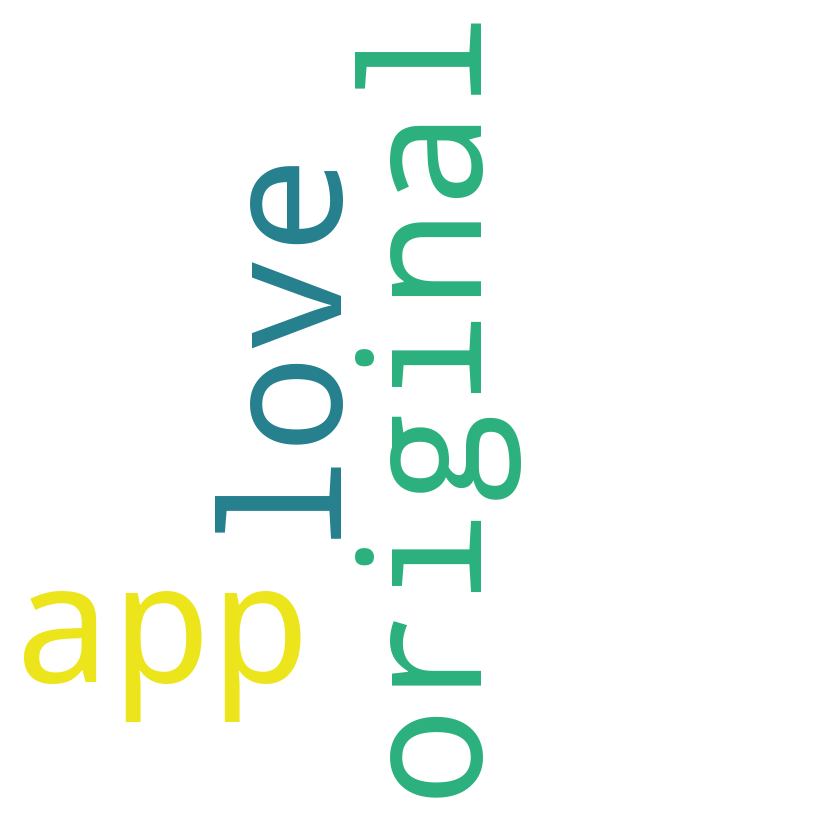

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in tiktokdf2.review:

   # typecaste each val to string
   val = str(val)

   # split the value
   tokens = val.split()

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

for words in tokens:
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            stopwords = stopwords,
            min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
ser = pd.Series(' '.join(tiktokdf2['review']).lower().split()).value_counts()[:10]
ser

,count
to,2248
i,2226
and,2021
the,1898
a,1505
it,1377
app,1169
you,1039
is,1030
love,960


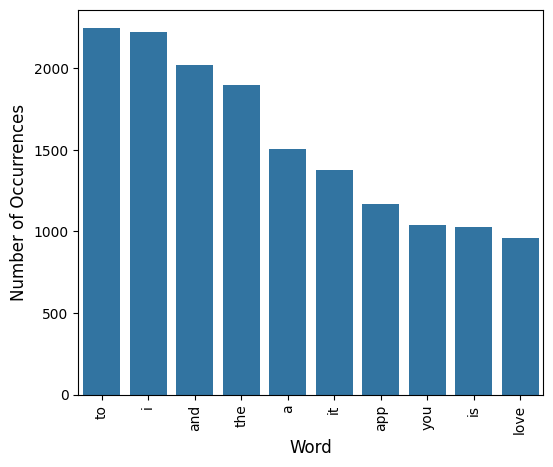

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6,5))
sns.barplot(x=ser.index, y=ser.values, ax=ax)
ax.set_ylabel('Number of Occurrences', fontsize=12)
ax.set_xlabel('Word', fontsize=12)
ax.xaxis.set_tick_params(rotation=90)